C:\Users\Jigyasu\AppData\Local\Temp\ipykernel_20112\22047002.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'])


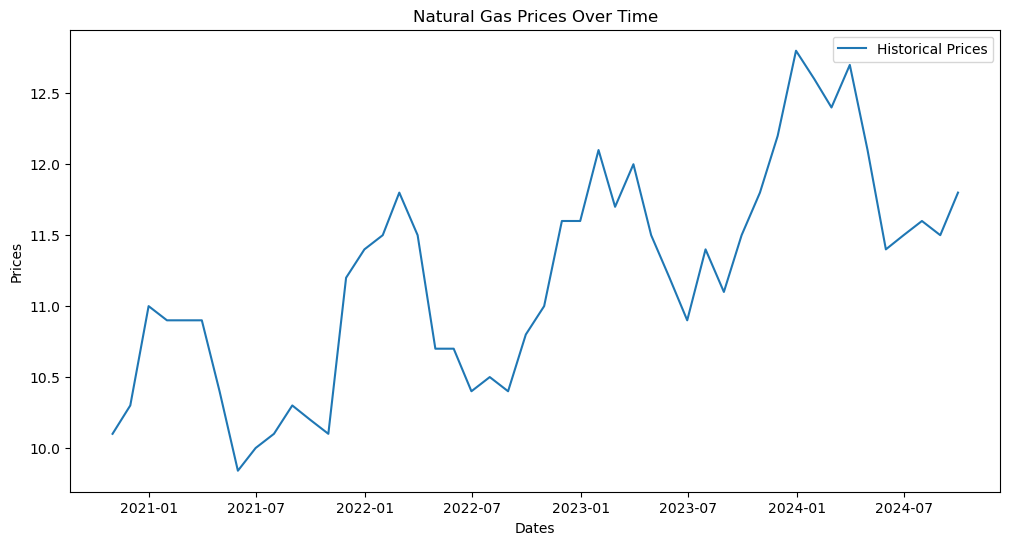

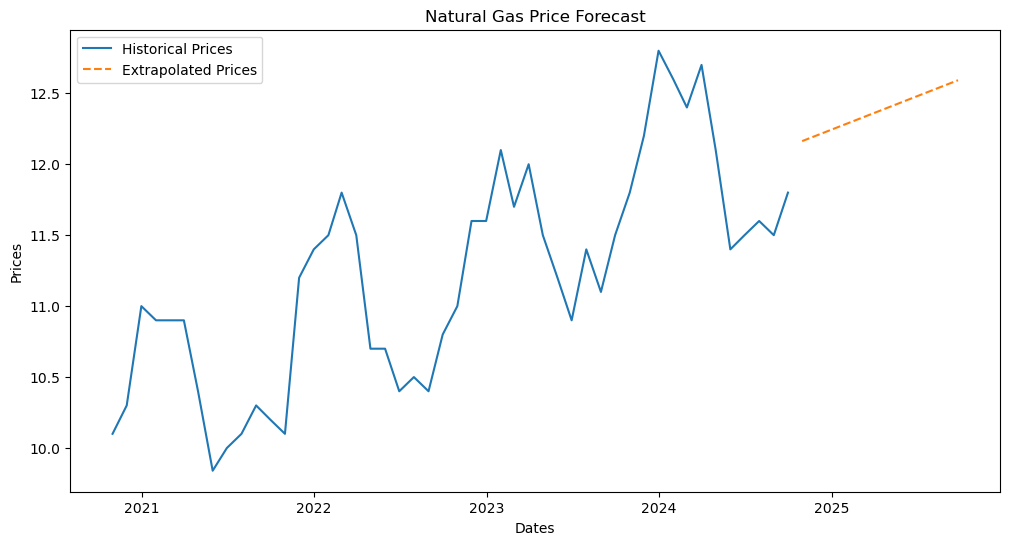

Predicted price on 2025-01-15: 12.28


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# Load the data from CSV
data = pd.read_csv('Nat_Gas.csv')

# Convert date column to datetime
data['Dates'] = pd.to_datetime(data['Dates'])

# Extract features: month and year for seasonality
data['Month'] = data['Dates'].dt.month
data['Year'] = data['Dates'].dt.year

# Plot the historical prices to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(data['Dates'], data['Prices'], label='Historical Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Natural Gas Prices Over Time')
plt.legend()
plt.show()

# Prepare data for modeling
X = np.array(data.index).reshape(-1, 1)  # Using index as a feature for simplicity
y = data['Prices'].values

# Train a linear regression model for extrapolation
model = LinearRegression()
model.fit(X, y)

# Function to predict price for a given date
def predict_price(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d')
    date_index = (date - data['Dates'].min()).days // 30  # Approximate monthly index
    predicted_price = model.predict(np.array([[date_index]]))
    return predicted_price[0]

# Extrapolate for one additional year (12 months)
future_dates = [data['Dates'].max() + timedelta(days=30 * i) for i in range(1, 13)]
future_indices = np.array([len(data) + i for i in range(12)]).reshape(-1, 1)
future_prices = model.predict(future_indices)

# Plot extrapolated prices
plt.figure(figsize=(12, 6))
plt.plot(data['Dates'], data['Prices'], label='Historical Prices')
plt.plot(future_dates, future_prices, label='Extrapolated Prices', linestyle='--')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Natural Gas Price Forecast')
plt.legend()
plt.show()

# Example usage: Predict price on a specific date
example_date = '2025-01-15'
predicted_price = predict_price(example_date)
print(f"Predicted price on {example_date}: {predicted_price:.2f}")